# **Introdução:**

Nesse estudo feito junto à *Hashtag Treinamentos*, vamos aprender uma pitadinha da integração do Python com plataformas financeiras de forma dinâmica e gerando insights a partir dos dados.

### ***Preparando ambiente Python:***

Importando Bibliotecas necessárias

In [484]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime,timedelta
import numpy as np

import pandas_datareader.data as pdr
import yfinance

yfinance.pdr_override() #sobrescrever o pandas datareader

As duas novas bibliotecas vão permitir nos comunicarmos com a plataforma ***Yahoo Finance*** de forma dinâmica.

---

# **Operacionalizando com as bibiliotecas**

---

Vamos, então, obter o índice ***IBOVESPA (BVSP)*** de forma dinâmica no nosso código Python e analisá-lo

In [485]:
data_inicial = datetime.now() - timedelta(days=360) #analizando o úlltimo 1 ano da variável
data_final = datetime.now()
print(f'de \n{data_inicial}\naté\n{data_final}')

#pegando os dados do Yahoo passando as datas acima:
df_ibov = pdr.get_data_yahoo("^BVSP", data_inicial, data_final)
display(df_ibov)

de 
2022-11-03 13:22:27.363805
até
2023-10-29 13:22:27.363824


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-11-03,116927.0,117373.0,114485.0,116896.0,116896.0,15634600
2022-11-04,116907.0,120039.0,116904.0,118155.0,118155.0,16209500
2022-11-07,118148.0,118240.0,115266.0,115342.0,115342.0,15221900
2022-11-08,115340.0,117072.0,114688.0,116160.0,116160.0,14239800
2022-11-09,116153.0,116183.0,113110.0,113580.0,113580.0,20531600
...,...,...,...,...,...,...
2023-10-23,113145.0,113680.0,112164.0,112785.0,112785.0,10701800
2023-10-24,112814.0,114249.0,112814.0,113762.0,113762.0,10711800
2023-10-25,113762.0,114319.0,112680.0,112830.0,112830.0,12306500


Gráfico com média móvel:

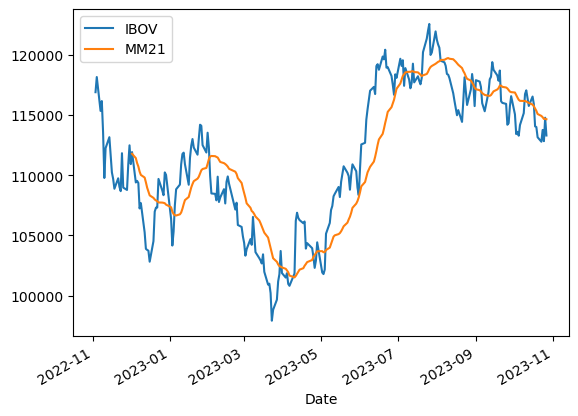

In [486]:
media_movel = df_ibov['Adj Close'].rolling(21).mean() #média móvel de 21 dias

df_ibov['Adj Close'].plot(label="IBOV")
media_movel.plot(label="MM21")
plt.legend()
plt.show()

Agora, vamos analisar ***o retorno do índice no último ano***

In [487]:
retorno_ibov = df_ibov['Adj Close'].iloc[-1] / df_ibov['Adj Close'].iloc[0] - 1
print(f"O retorno do IBOV foi: {retorno_ibov:.1%}")

O retorno do IBOV foi: -3.1%


Cada vez que rodarmos o código, veremos retorno em porcentagem no tempo definido e de forma sempre **atualizada**

---

# **Analisando Carteiras de investimentos:**

---

Agora, vamos fazer uma análise de performance de uma ***carteira personalizada*** fictícia em um excel usando Python:

In [488]:
df_carteira = pd.read_excel("Carteira.xlsx") #importando carteira no Excel
display(df_carteira)

,Ativos,Tipo,Qtde
0,BOVA11,ETF,100
1,SMAL11,ETF,100
2,MGLU3,Ação,100
3,BBDC4,Ação,100
4,ITUB4,Ação,300
5,ENEV3,Ação,100
6,MOVI3,Ação,100
7,BPAC11,Ação,100
8,NTCO3,Ação,100
9,BCRI11,FII,100


Agora, faremos o mesmo processo importando os ativos do Yahoo Finance:

In [489]:
data_inicial = datetime.now() - timedelta(days=360)
data_final = datetime.now()

lista_ativos = list(df_carteira["Ativos"].astype(str) + ".SA") #separando nossos ativos numa lista

print(f'de \n{data_inicial}\naté\n{data_final}')

#procurando ativo.SA no Yahoo Finance e pegando apenas o fechamento da ação
df_cotacoes = pdr.get_data_yahoo(lista_ativos, data_inicial, data_final)["Adj Close"] 

display(df_cotacoes)

de 
2022-11-03 13:22:27.855419
até
2023-10-29 13:22:27.855437


[*********************100%%**********************]  13 of 13 completed


,BBDC4.SA,BCRI11.SA,BOVA11.SA,BPAC11.SA,ENEV3.SA,ITUB4.SA,KNRI11.SA,MGLU3.SA,MOVI3.SA,NTCO3.SA,SMAL11.SA,VILG11.SA,XPLG11.SA
Date,,,,,,,,,,,,,
2022-11-03,18.360483,91.603508,113.099998,28.081192,13.64,28.553007,134.456589,4.87,13.507686,14.47,114.870003,99.780739,98.339203
2022-11-04,18.163860,91.361855,114.000000,28.586636,14.21,28.656872,134.187286,4.83,13.720557,14.35,115.500000,99.752907,98.763435
2022-11-07,17.564642,91.343948,111.220001,27.643789,13.72,28.005365,133.620865,4.54,13.043237,13.42,110.580002,100.439331,98.274643
2022-11-08,17.396109,90.574249,112.300003,27.828470,13.86,27.920387,133.871597,4.63,11.988554,13.09,111.180000,100.550652,98.671219
2022-11-09,14.371921,90.439995,109.750000,27.361910,13.81,26.579601,132.692291,4.47,11.195123,13.14,109.150002,99.437523,98.422203
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-23,14.180000,67.900002,109.349998,30.360001,11.19,26.990000,158.779999,1.51,9.290000,12.95,95.470001,102.650002,109.589996
2023-10-24,14.180000,68.059998,110.239998,30.860001,11.23,26.990000,159.330002,1.41,9.340000,13.43,96.300003,102.470001,107.809998
2023-10-25,14.140000,67.529999,109.349998,30.850000,11.04,27.040001,160.320007,1.44,8.900000,12.75,94.709999,103.099998,107.320000


In [490]:
print(df_cotacoes.info())
print('\n')
df_cotacoes.isna().any()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 247 entries, 2022-11-03 to 2023-10-27
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   BBDC4.SA   247 non-null    float64
 1   BCRI11.SA  247 non-null    float64
 2   BOVA11.SA  247 non-null    float64
 3   BPAC11.SA  246 non-null    float64
 4   ENEV3.SA   247 non-null    float64
 5   ITUB4.SA   247 non-null    float64
 6   KNRI11.SA  247 non-null    float64
 7   MGLU3.SA   247 non-null    float64
 8   MOVI3.SA   247 non-null    float64
 9   NTCO3.SA   247 non-null    float64
 10  SMAL11.SA  247 non-null    float64
 11  VILG11.SA  247 non-null    float64
 12  XPLG11.SA  247 non-null    float64
dtypes: float64(13)
memory usage: 27.0 KB
None




BBDC4.SA     False
BCRI11.SA    False
BOVA11.SA    False
BPAC11.SA     True
ENEV3.SA     False
ITUB4.SA     False
KNRI11.SA    False
MGLU3.SA     False
MOVI3.SA     False
NTCO3.SA     False
SMAL11.SA    False
VILG11.SA    False
XPLG11.SA    False
dtype: bool

Tratando valores NaN preenchendo com a mesma do dia anterior, que faz sentido por se tratar de cotações 

In [491]:
df_cotacoes = df_cotacoes.ffill() #comando que preenche com o valor anterior 
df_cotacoes.isna().any()

BBDC4.SA     False
BCRI11.SA    False
BOVA11.SA    False
BPAC11.SA    False
ENEV3.SA     False
ITUB4.SA     False
KNRI11.SA    False
MGLU3.SA     False
MOVI3.SA     False
NTCO3.SA     False
SMAL11.SA    False
VILG11.SA    False
XPLG11.SA    False
dtype: bool

Vamos agora exibir nossas informações, porém, vamos usar um valor normalizado em relação ao valor da ação no início do período... Isso devido à oscilação de preços entre ações e podemos ver as oscilações em proporção:

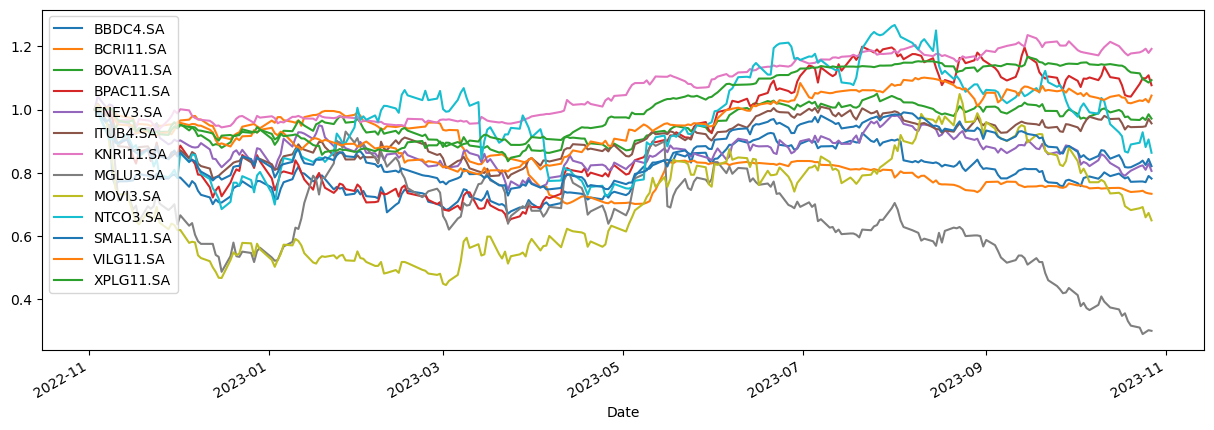

In [492]:
df_cotacoes_norm = df_cotacoes / df_cotacoes.iloc[0]
df_cotacoes_norm.plot(figsize=(15, 5))
plt.legend(loc="upper left")
plt.show()

Analisando performance de cada ação no período:

In [493]:
retorno_ibov = df_cotacoes.iloc[-1] / df_cotacoes.iloc[0] - 1
i=0

from colorama import Fore, Back, Style
lista_ativos = list(df_cotacoes.keys())

for retorno in retorno_ibov:
    if retorno > 0:
        print(f"O retorno do {Fore.GREEN + lista_ativos[i] + Style.RESET_ALL} foi: {Fore.GREEN}{retorno:.1%}{Style.RESET_ALL}")
    else:
        print(f"O retorno do {Fore.RED + lista_ativos[i] + Style.RESET_ALL} foi: {Fore.RED}{retorno:.1%}{Style.RESET_ALL}")
    i+=1

O retorno do BBDC4.SA foi: -21.8%
O retorno do BCRI11.SA foi: -26.7%
O retorno do BOVA11.SA foi: -2.9%
O retorno do BPAC11.SA foi: 7.7%
O retorno do ENEV3.SA foi: -19.4%
O retorno do ITUB4.SA foi: -4.4%
O retorno do KNRI11.SA foi: 19.2%
O retorno do MGLU3.SA foi: -70.0%
O retorno do MOVI3.SA foi: -35.1%
O retorno do NTCO3.SA foi: -13.7%
O retorno do SMAL11.SA foi: -17.9%
O retorno do VILG11.SA foi: 4.4%
O retorno do XPLG11.SA foi: 9.3%


Agora que conseguimos analisar ação por ação na nossa carteira, vamos retomar e ver o desempenho real da nossa carteira:

In [494]:
display(df_carteira)

,Ativos,Tipo,Qtde
0,BOVA11,ETF,100
1,SMAL11,ETF,100
2,MGLU3,Ação,100
3,BBDC4,Ação,100
4,ITUB4,Ação,300
5,ENEV3,Ação,100
6,MOVI3,Ação,100
7,BPAC11,Ação,100
8,NTCO3,Ação,100
9,BCRI11,FII,100


Acima, podemos ver que tempos a ***Quantidade de ações compradas*** de cada ativo, portanto, vamos fazer os cálculos e analisar o desempenho da nossa carteira:

In [495]:
df_valor_investido = pd.DataFrame()

for ativo in df_carteira["Ativos"]:
    qtde_acoes = df_carteira.loc[df_carteira["Ativos"]==ativo, "Qtde"].values[0]
    df_valor_investido[ativo] = qtde_acoes * df_cotacoes[f"{ativo}.SA"]

df_valor_investido["Total"] = df_valor_investido.sum(axis=1)
display(df_valor_investido)

,BOVA11,SMAL11,MGLU3,BBDC4,ITUB4,ENEV3,MOVI3,BPAC11,NTCO3,BCRI11,VILG11,KNRI11,XPLG11,Total
Date,,,,,,,,,,,,,,
2022-11-03,11309.999847,11487.000275,486.999989,1836.048317,8565.902138,1364.000034,1350.768566,2808.119202,1447.000027,9160.350800,9978.073883,13445.658875,9833.920288,83073.842239
2022-11-04,11400.000000,11550.000000,482.999992,1816.386032,8597.061539,1421.000004,1372.055721,2858.663559,1435.000038,9136.185455,9975.290680,13418.728638,9876.343536,83339.715195
2022-11-07,11122.000122,11058.000183,453.999996,1756.464195,8401.609612,1372.000027,1304.323673,2764.378929,1342.000008,9134.394836,10043.933105,13362.086487,9827.464294,81942.655468
2022-11-08,11230.000305,11118.000031,463.000011,1739.610863,8376.116180,1385.999966,1198.855400,2782.847023,1309.000015,9057.424927,10055.065155,13387.159729,9867.121887,81970.201492
2022-11-09,10975.000000,10915.000153,446.999979,1437.192059,7973.880386,1381.000042,1119.512272,2736.190987,1314.000034,9043.999481,9943.752289,13269.229126,9842.220306,80397.977114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-23,10934.999847,9547.000122,150.999999,1418.000031,8096.999931,1118.999958,928.999996,3036.000061,1294.999981,6790.000153,10265.000153,15877.999878,10958.999634,80418.999743
2023-10-24,11023.999786,9630.000305,140.999997,1418.000031,8096.999931,1122.999954,934.000015,3086.000061,1343.000031,6805.999756,10247.000122,15933.000183,10780.999756,80562.999928
2023-10-25,10934.999847,9470.999908,144.000006,1414.000034,8112.000275,1103.999996,889.999962,3085.000038,1275.000000,6752.999878,10309.999847,16032.000732,10731.999969,80257.000494


In [496]:
retorno_bruto = df_valor_investido.iloc[-1] - df_valor_investido.iloc[0] 
i=0
lista_ativos = list(df_valor_investido.keys())

for saldo in retorno_bruto:
    if lista_ativos[i] == 'Total': 
        break
    elif saldo > 0:
        print(f"O saldo do {Fore.GREEN + lista_ativos[i] + Style.RESET_ALL} foi: {Fore.GREEN}R${saldo:,.2f}{Style.RESET_ALL}")
    else:
        print(f"O saldo do {Fore.RED + lista_ativos[i] + Style.RESET_ALL} foi: {Fore.RED}R${saldo:,.2f}{Style.RESET_ALL}")
    i+=1
    
    
rentabilidade_total = df_valor_investido["Total"].iloc[-1] - df_valor_investido["Total"].iloc[0]

print()

if rentabilidade_total> 0:
    print(f"O saldo Total é de {Fore.GREEN}R${rentabilidade_total:,.2f}{Style.RESET_ALL}")
else:
    print(f"O saldo Total é de {Fore.RED}R${rentabilidade_total:,.2f}{Style.RESET_ALL}")
    

O saldo do BOVA11 foi: R$-325.00
O saldo do SMAL11 foi: R$-2,057.00
O saldo do MGLU3 foi: R$-341.00
O saldo do BBDC4 foi: R$-401.05
O saldo do ITUB4 foi: R$-375.90
O saldo do ENEV3 foi: R$-265.00
O saldo do MOVI3 foi: R$-473.77
O saldo do BPAC11 foi: R$215.88
O saldo do NTCO3 foi: R$-198.00
O saldo do BCRI11 foi: R$-2,442.35
O saldo do VILG11 foi: R$439.93
O saldo do KNRI11 foi: R$2,578.34
O saldo do XPLG11 foi: R$917.08

O saldo Total é de R$-2,727.84


Podemos acompanhar a carteira em relação ao Ibovespa normalizado:

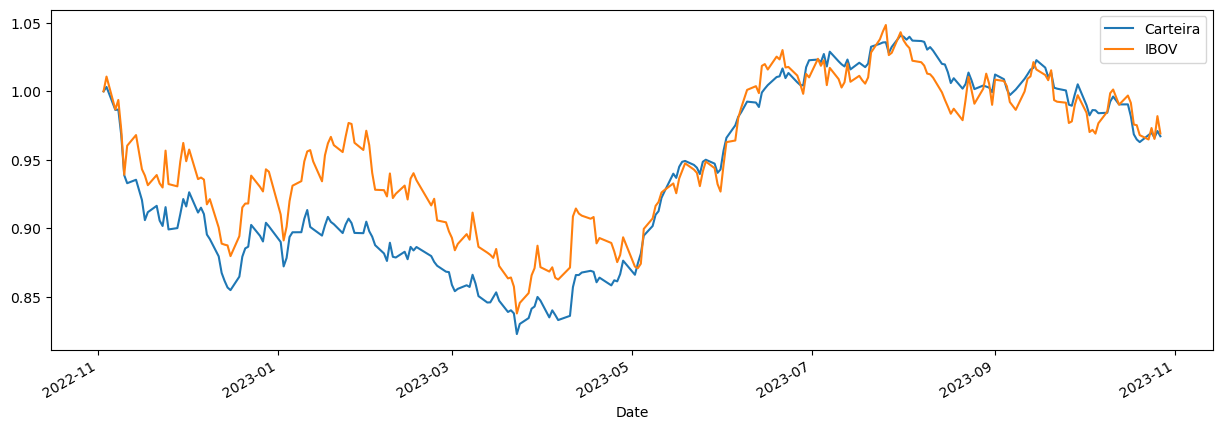

In [497]:
df_ibov_norm = df_ibov['Adj Close'] / df_ibov['Adj Close'].iloc[0]
df_valor_investido_norm = df_valor_investido / df_valor_investido.iloc[0]

df_valor_investido_norm["Total"].plot(label="Carteira", figsize=(15, 5))
df_ibov_norm.plot(label="IBOV")
plt.legend()
plt.show()

In [498]:
# Analisando o Retorno percentual em relação ao IBOV

retorno_ibov = df_ibov_norm[-1] - 1
retorno_carteira = df_valor_investido_norm["Total"][-1] - 1
correlacao = df_valor_investido["Total"].corr(df_ibov['Adj Close'])


print(f"Retorno IBOV: {retorno_ibov:.1%}")
print(f"Retorno Carteira: {retorno_carteira:.1%}")
print(f"Correlação Carteira e IBOV: {correlacao:.1%}")

Retorno IBOV: -3.1%
Retorno Carteira: -3.3%
Correlação Carteira e IBOV: 95.3%


/var/folders/8l/tk9h9sw50f302y56n_qqj1_w0000gn/T/ipykernel_58976/2697143668.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  retorno_ibov = df_ibov_norm[-1] - 1
/var/folders/8l/tk9h9sw50f302y56n_qqj1_w0000gn/T/ipykernel_58976/2697143668.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  retorno_carteira = df_valor_investido_norm["Total"][-1] - 1


---

# ***Em adição, vamos criar uma predição da Ação IBOV para o fechamento do dia seguinte***

---

O video tutorial da DataQuest (https://www.youtube.com/watch?v=1O_BenficgE) nos fornece informações interessantíssimas para montarmos nosso modelo de Machine Learning, e ele que iremos seguir de base nesse estudo:

Revisando nossos dados, vamos adicionar uma coluna 'amanha', nela, está conjecturado o valor de abertura do dia seguinte (será igual ao fechamento do dia anterior)

In [499]:
df_ibov['amanha'] = df_ibov['Adj Close'].shift(-1)
display(df_ibov)
df_ibov.info()

,Open,High,Low,Close,Adj Close,Volume,amanha
Date,,,,,,,
2022-11-03,116927.0,117373.0,114485.0,116896.0,116896.0,15634600,118155.0
2022-11-04,116907.0,120039.0,116904.0,118155.0,118155.0,16209500,115342.0
2022-11-07,118148.0,118240.0,115266.0,115342.0,115342.0,15221900,116160.0
2022-11-08,115340.0,117072.0,114688.0,116160.0,116160.0,14239800,113580.0
2022-11-09,116153.0,116183.0,113110.0,113580.0,113580.0,20531600,109775.0
...,...,...,...,...,...,...,...
2023-10-23,113145.0,113680.0,112164.0,112785.0,112785.0,10701800,113762.0
2023-10-24,112814.0,114249.0,112814.0,113762.0,113762.0,10711800,112830.0
2023-10-25,113762.0,114319.0,112680.0,112830.0,112830.0,12306500,114777.0


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 247 entries, 2022-11-03 to 2023-10-27
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       247 non-null    float64
 1   High       247 non-null    float64
 2   Low        247 non-null    float64
 3   Close      247 non-null    float64
 4   Adj Close  247 non-null    float64
 5   Volume     247 non-null    int64  
 6   amanha     246 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 15.4 KB


Percebemos que no dia 27 (último valor) obtemos um valor NaN, porque não temos o dia o qual vai ser o valor da próxima abertura

**Nosso modelo irá prever se a ação fechará *amanhã* mais alta do que ela irá abrir**

In [500]:
df_ibov['Target'] = (df_ibov['amanha'] > df_ibov['Open']).astype(int) #1 True 0 False
display(df_ibov)

,Open,High,Low,Close,Adj Close,Volume,amanha,Target
Date,,,,,,,,
2022-11-03,116927.0,117373.0,114485.0,116896.0,116896.0,15634600,118155.0,1
2022-11-04,116907.0,120039.0,116904.0,118155.0,118155.0,16209500,115342.0,0
2022-11-07,118148.0,118240.0,115266.0,115342.0,115342.0,15221900,116160.0,0
2022-11-08,115340.0,117072.0,114688.0,116160.0,116160.0,14239800,113580.0,0
2022-11-09,116153.0,116183.0,113110.0,113580.0,113580.0,20531600,109775.0,0
...,...,...,...,...,...,...,...,...
2023-10-23,113145.0,113680.0,112164.0,112785.0,112785.0,10701800,113762.0,1
2023-10-24,112814.0,114249.0,112814.0,113762.0,113762.0,10711800,112830.0,1
2023-10-25,113762.0,114319.0,112680.0,112830.0,112830.0,12306500,114777.0,1


Na coluna Target, comparamos o valor de abertura de um dia com a coluna amanhã.

1 > A ação subiu

0 > A ação caiu

Agora, vamos criar o modelo de Machine Learning para prever se a ação irá subir no dia seguinte:

In [501]:
from sklearn.ensemble import RandomForestClassifier

modelo = RandomForestClassifier(n_estimators=25, 
                                min_samples_split=25, 
                                random_state=1
                                )

Vamos usar  o Random Forest, que nada mais é que uma cascata de Decision Trees

In [502]:
porcentagem_treino = int(0.90*len(df_ibov)) 
#alocando 90% para treino por se tratar de uma variável temporal, o tempo retroativo é importante para análise
treino = df_ibov.iloc[:porcentagem_treino]
teste = df_ibov.iloc[porcentagem_treino:]

display(treino.head())
display(teste.tail())
print(len(treino) + len(teste))

,Open,High,Low,Close,Adj Close,Volume,amanha,Target
Date,,,,,,,,
2022-11-03,116927.0,117373.0,114485.0,116896.0,116896.0,15634600,118155.0,1
2022-11-04,116907.0,120039.0,116904.0,118155.0,118155.0,16209500,115342.0,0
2022-11-07,118148.0,118240.0,115266.0,115342.0,115342.0,15221900,116160.0,0
2022-11-08,115340.0,117072.0,114688.0,116160.0,116160.0,14239800,113580.0,0
2022-11-09,116153.0,116183.0,113110.0,113580.0,113580.0,20531600,109775.0,0


,Open,High,Low,Close,Adj Close,Volume,amanha,Target
Date,,,,,,,,
2023-10-23,113145.0,113680.0,112164.0,112785.0,112785.0,10701800,113762.0,1
2023-10-24,112814.0,114249.0,112814.0,113762.0,113762.0,10711800,112830.0,1
2023-10-25,113762.0,114319.0,112680.0,112830.0,112830.0,12306500,114777.0,1
2023-10-26,112840.0,114886.0,112840.0,114777.0,114777.0,12770600,113301.0,1
2023-10-27,114777.0,115342.0,112953.0,113301.0,113301.0,12289500,NaN,0


247


In [503]:
videntes = ['Open','High','Low','Close','Adj Close','Volume']
modelo.fit(treino[videntes], treino['Target'])

RandomForestClassifier(min_samples_split=25, n_estimators=25, random_state=1)

In [504]:
from sklearn.metrics import precision_score
import pandas as pd

previsao = modelo.predict(teste[videntes])
previsao = pd.Series(previsao, index=teste.index)
display(previsao)
precision_score(teste['Target'], previsao)

Date
2023-09-22    1
2023-09-25    1
2023-09-26    1
2023-09-27    1
2023-09-28    1
2023-09-29    1
2023-10-02    1
2023-10-03    1
2023-10-04    0
2023-10-05    1
2023-10-06    1
2023-10-09    1
2023-10-10    1
2023-10-11    1
2023-10-13    1
2023-10-16    1
2023-10-17    1
2023-10-18    0
2023-10-19    1
2023-10-20    1
2023-10-23    1
2023-10-24    1
2023-10-25    1
2023-10-26    1
2023-10-27    1
dtype: int64

0.4782608695652174

Num primeiro momento, conseguimos uma precisão de 47,82%...

Precisamos enriquecer nosso modelo, com esse resultado, um simples chute (comprar ou não comprar) pode garantir mais segurança que o modelo

---

# ***Enriquecimento do modelo***

---

Vamos usar um algoritmo de recursão e implementar um Backtesting, assim, iremos dividir o aprendizado em blocos:

In [505]:
def prever(treino, teste, videntes, modelo):
    modelo.fit(treino[videntes], treino['Target'])
    previsao = modelo.predict(teste[videntes])
    previsao = pd.Series(previsao, index=teste.index, name='Predictions')
    comparacao = pd.concat([teste['Target'], previsao], axis=1)###
    return comparacao

Agora, prepararemos o Backtesting e usaremos gaps de 15 dias, indo de 7 em 7 (testados manualmente)

In [506]:
def backtest(data, modelo, videntes, start = 15, step=7): 
    all_predictions = []
    for i in range(start,data.shape[0],step):
        treino = data.iloc[0:i].copy()
        teste = data.iloc[i:(i+step)].copy()
        prediction = prever(treino, teste, videntes, modelo)
        all_predictions.append(prediction)
    return pd.concat(all_predictions)

obs: Os valores de `start` e `step` foram definidos testando e me disponibilizo inteiramente para discussão e maior compreensão sobre o assunto

Agora, vamos para execução:

In [507]:
previsao_backtest = backtest(df_ibov, modelo, videntes)

In [508]:
display(previsao_backtest)
previsao_backtest['Predictions'].value_counts()
precision_score(previsao_backtest['Target'], previsao_backtest['Predictions'])

,Target,Predictions
Date,,
2022-11-25,0,0
2022-11-28,1,0
2022-11-29,1,0
2022-11-30,1,0
2022-12-01,0,0
...,...,...
2023-10-23,1,0
2023-10-24,1,0
2023-10-25,1,1


0.5697674418604651

Conseguimos subir nossa precisão para perto de 57%! 

Mas o video ainda dá mais sugestões, iremos implementar uma comparação usando os números móveis da ação:

Enriquecendo mais o modelo usando números comparativos em 2, 5, 30, 60, 90 e 150 dias

In [509]:
comparacao_temporal = [2,5,30,60,90,150]
novos_videntes = []
for comparacao in comparacao_temporal:
    ###comparando com media movel
    media_movel = df_ibov['Adj Close'].rolling(comparacao).mean()
    
    coluna_ratio = f'ratio_in_{comparacao}'
    df_ibov[coluna_ratio] = df_ibov['Adj Close'] / media_movel
    
    ###pegando quantas vezes a acao subiu no periodo da media móValueError
    trend_column = f'trends_{comparacao}'
    df_ibov[trend_column] = df_ibov.shift(1).rolling(comparacao).sum()['Target']

display(df_ibov)

,Open,High,Low,Close,Adj Close,Volume,amanha,Target,ratio_in_2,trends_2,ratio_in_5,trends_5,ratio_in_30,trends_30,ratio_in_60,trends_60,ratio_in_90,trends_90,ratio_in_150,trends_150
Date,,,,,,,,,,,,,,,,,,,,
2022-11-03,116927.0,117373.0,114485.0,116896.0,116896.0,15634600,118155.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-11-04,116907.0,120039.0,116904.0,118155.0,118155.0,16209500,115342.0,0,1.005356,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-11-07,118148.0,118240.0,115266.0,115342.0,115342.0,15221900,116160.0,0,0.987953,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-11-08,115340.0,117072.0,114688.0,116160.0,116160.0,14239800,113580.0,0,1.003533,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-11-09,116153.0,116183.0,113110.0,113580.0,113580.0,20531600,109775.0,0,0.988770,0.0,0.978913,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-23,113145.0,113680.0,112164.0,112785.0,112785.0,10701800,113762.0,1,0.998362,0.0,0.989495,1.0,0.973520,13.0,0.965783,23.0,0.959911,39.0,0.996297,74.0
2023-10-24,112814.0,114249.0,112814.0,113762.0,113762.0,10711800,112830.0,1,1.004313,1.0,1.001839,1.0,0.982836,13.0,0.975043,24.0,0.968684,40.0,1.004169,75.0
2023-10-25,113762.0,114319.0,112680.0,112830.0,112830.0,12306500,114777.0,1,0.995887,2.0,0.995788,2.0,0.976229,13.0,0.968315,24.0,0.961387,40.0,0.995249,76.0


In [510]:
df_ibov = df_ibov.dropna()
df_ibov

,Open,High,Low,Close,Adj Close,Volume,amanha,Target,ratio_in_2,trends_2,ratio_in_5,trends_5,ratio_in_30,trends_30,ratio_in_60,trends_60,ratio_in_90,trends_90,ratio_in_150,trends_150
Date,,,,,,,,,,,,,,,,,,,,
2023-06-13,117337.0,117924.0,116363.0,116743.0,116743.0,12392200,119069.0,1,0.997467,1.0,1.004334,4.0,1.064378,22.0,1.099073,34.0,1.096679,44.0,1.082966,75.0
2023-06-14,116753.0,119085.0,116745.0,119069.0,119069.0,16938600,119221.0,1,1.009864,1.0,1.016546,4.0,1.079958,23.0,1.118228,34.0,1.117883,44.0,1.104481,75.0
2023-06-15,119068.0,119686.0,118693.0,119221.0,119221.0,12298000,118758.0,0,1.000638,2.0,1.011397,4.0,1.075670,24.0,1.116642,35.0,1.118503,44.0,1.105626,76.0
2023-06-16,119208.0,119555.0,118487.0,118758.0,118758.0,15251700,119858.0,1,0.998054,1.0,1.004505,3.0,1.066175,23.0,1.109218,35.0,1.113135,44.0,1.101155,76.0
2023-06-19,118757.0,119939.0,118558.0,119858.0,119858.0,6776300,119622.0,1,1.004610,1.0,1.009502,3.0,1.071335,23.0,1.116215,36.0,1.122117,45.0,1.110924,77.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-20,113996.0,114090.0,112533.0,113155.0,113155.0,0,112785.0,0,0.996263,0.0,0.986253,1.0,0.976004,13.0,0.967956,23.0,0.962474,40.0,1.000202,74.0
2023-10-23,113145.0,113680.0,112164.0,112785.0,112785.0,10701800,113762.0,1,0.998362,0.0,0.989495,1.0,0.973520,13.0,0.965783,23.0,0.959911,39.0,0.996297,74.0
2023-10-24,112814.0,114249.0,112814.0,113762.0,113762.0,10711800,112830.0,1,1.004313,1.0,1.001839,1.0,0.982836,13.0,0.975043,24.0,0.968684,40.0,1.004169,75.0


Vamos recrirar nossas funções e Backtesting adaptados para nosso novo modelo

In [511]:
novo_modelo = RandomForestClassifier(n_estimators=15, 
                                min_samples_split=10, 
                                random_state=1
                                )

In [512]:
def prever2(treino, teste, videntes, modelo):
    modelo.fit(treino[videntes], treino['Target'])
    previsao = modelo.predict_proba(teste[videntes])[:,1] #pegando segunda coluna (probabilidade de subir)
    previsao[previsao >= .7] = 1 ####### IMPORTANTE NA OBSERVAÇÃO FINAL 
    previsao[previsao < .7] = 0
    previsao = pd.Series(previsao, index=teste.index, name='Predictions')
    comparacao = pd.concat([teste['Target'], previsao], axis=1)###
    return comparacao

Nessa nova função prever2() estamos implementando o critério: `previsao[previsao >= .7] = 1`

Graças a ele, nosso modelo só assumirá que o valor seguinte será 1 caso ele tenha 70% de certeza!

In [513]:
def backtest2(data, modelo, videntes, start = 16, step=7): 
    all_predictions = []
    for i in range(start,data.shape[0],step):
        treino = data.iloc[0:i].copy()
        teste = data.iloc[i:(i+step)].copy()
        prediction = prever2(treino, teste, videntes, modelo)
        all_predictions.append(prediction)
    return pd.concat(all_predictions)

In [514]:
videntes = ['Open','Adj Close','Volume', 
            'ratio_in_2','trends_2', 
            'ratio_in_5', 'trends_5',
            'ratio_in_30', 'trends_30',
            'ratio_in_60', 'trends_60',
            'ratio_in_90', 'trends_90',
            'ratio_in_150', 'trends_150'
            ]

previsao_backtest = backtest2(df_ibov, novo_modelo, videntes)
previsao_backtest['Predictions'].value_counts()
precision_score(previsao_backtest['Target'], previsao_backtest['Predictions'])

0.8571428571428571

Devido às condições impostas de assumir o valor 1 (valor BVSP subiu) somente quando o modelo tiver 70% de certeza que ele irá subir, isso traduz nosso resultado final como:

***85,7% das vezes que o modelo assumiu que o valor ia subir ele realmente subiu***

Olhando, agora, as previsões:

In [515]:
display(previsao_backtest)

,Target,Predictions
Date,,
2023-07-05,0,0.0
2023-07-06,0,0.0
2023-07-07,1,0.0
2023-07-10,0,0.0
2023-07-11,0,0.0
...,...,...
2023-10-20,0,0.0
2023-10-23,1,0.0
2023-10-24,1,1.0


Portanto, o modelo é satisfatóriamente preciso para implementações ao prever a bolsa BVSP!